In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("dataset/Bookk1.xlsx",header=None,names=['#','col1','col2','col3','col4'],index_col=0)

In [3]:
df

,col1,col2,col3,col4
#,,,,
1,23,334,56,-20
2,34,341,89,65
3,56,353,54,-90
4,56,543,122,4
5,12,533,34,2


In [4]:
df['col1']  # series

#
1    23
2    34
3    56
4    56
5    12
Name: col1, dtype: int64

In [5]:
df[['col1','col2']]# dataframe

,col1,col2
#,,
1,23,334
2,34,341
3,56,353
4,56,543
5,12,533


In [8]:
df

,col1,col2,col3,col4
#,,,,
1,23,334,56,-20
2,34,341,89,65
3,56,353,54,-90
4,56,543,122,4
5,12,533,34,2


In [9]:
df.iloc[0] # row

col1     23
col2    334
col3     56
col4    -20
Name: 1, dtype: int64

In [10]:
print(df['col1'].sum())
print(df['col2'].mean())
print(df['col3'].max())

181
420.8
122


<Axes: ylabel='Density'>

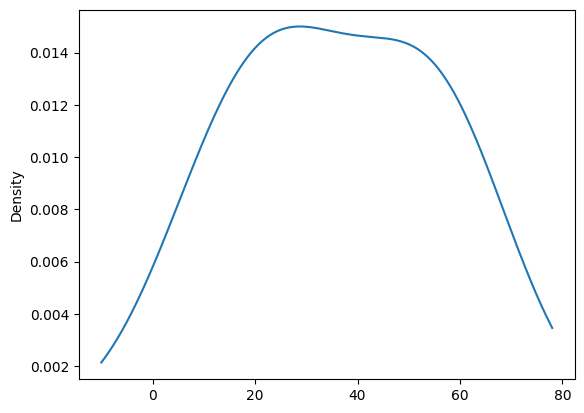

In [11]:
df.col1.plot(kind='kde')

<Axes: xlabel='#'>

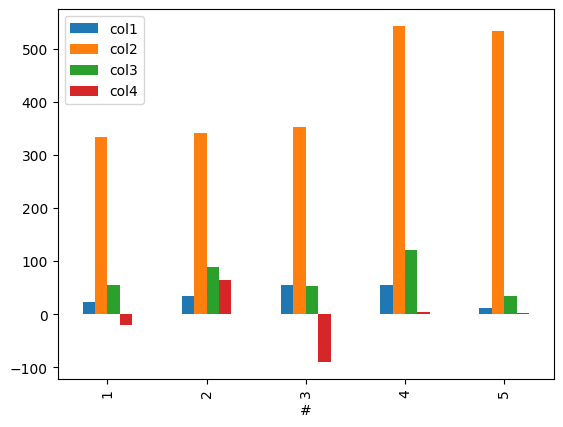

In [12]:
df.plot(kind='bar')

passing your manual data dictionary to pandas

In [13]:
data ={
    'country': ['Brazil','Russia','India','China','South Africa'],
    'population':[200.40,143.47,1234,435.83,543.50],
    'gdp':[1.86,1.3,2.5,22.4,0.43],
    'area':[645643,376464,948755,767594,578433]
}

cdf = pd.DataFrame(data)
cdf

,country,population,gdp,area
0,Brazil,200.40,1.86,645643
1,Russia,143.47,1.30,376464
2,India,1234.00,2.50,948755
3,China,435.83,22.40,767594
4,South Africa,543.50,0.43,578433


In [14]:
print(cdf['gdp'].mean())

5.6979999999999995


<Axes: xlabel='country'>

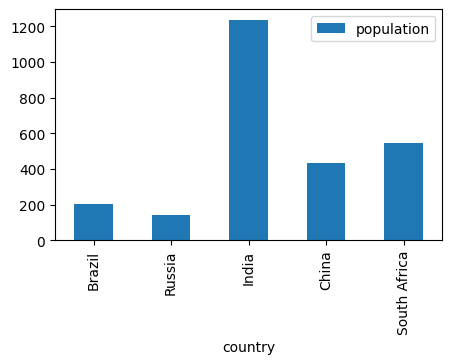

In [15]:
cdf.plot(kind='bar',x='country',y='population',figsize=(5,3))

<Axes: xlabel='country'>

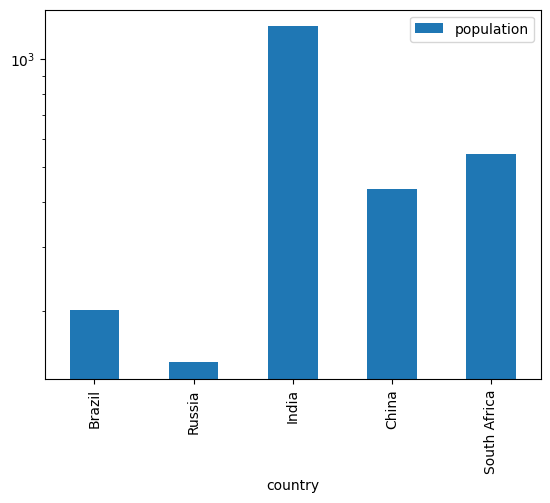

In [16]:
cdf.plot(kind='bar',x='country',y='population',logy=True)

<Axes: xlabel='country'>

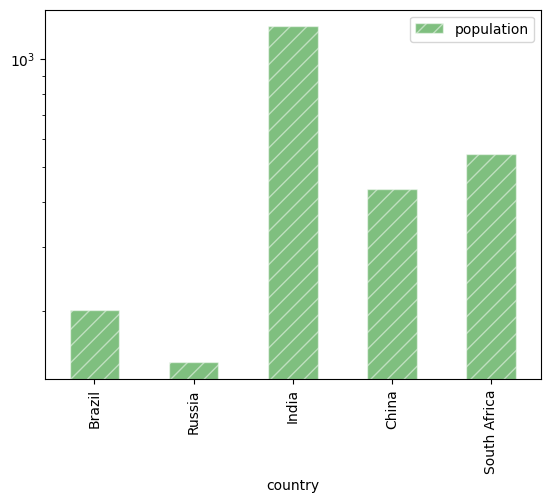

In [17]:
cdf.plot(kind='bar',x='country',y='population',logy=True,color='green',alpha=0.5,hatch='//',edgecolor='white')

In [18]:
cdf.columns.tolist()

['country', 'population', 'gdp', 'area']

pandas dataframe manipulation

- rename columns
- replace columns
- add new columns
- remove columns
- drop duplicates
- drop rows with missing values
- creating subsets
- merging dataframes

In [19]:
import numpy as np
df = pd.DataFrame({
    'Rank':[1,2,3,4,5,6,7,8,9,10],
    'country name':['India','United States','Indonesia','Pakistan','Brazil','Bangaldesh','Russia','Nigeria','Mexico','Japan'],
    'currency':['INR','USD',np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
})
df

,Rank,country name,currency
0,1,India,INR
1,2,United States,USD
2,3,Indonesia,NaN
3,4,Pakistan,NaN
4,5,Brazil,NaN
5,6,Bangaldesh,NaN
6,7,Russia,NaN
7,8,Nigeria,NaN
8,9,Mexico,NaN
9,10,Japan,NaN


In [20]:
df.rank

<bound method NDFrame.rank of    Rank   country name currency
0     1          India      INR
1     2  United States      USD
2     3      Indonesia      NaN
3     4       Pakistan      NaN
4     5         Brazil      NaN
5     6     Bangaldesh      NaN
6     7         Russia      NaN
7     8        Nigeria      NaN
8     9         Mexico      NaN
9    10          Japan      NaN>

In [21]:
df['country name']

0            India
1    United States
2        Indonesia
3         Pakistan
4           Brazil
5       Bangaldesh
6           Russia
7          Nigeria
8           Mexico
9            Japan
Name: country name, dtype: object

In [22]:
df = df.rename(
    columns={
        'Rank':'rank',
        'country name': 'country',
    }
)

In [23]:
df

,rank,country,currency
0,1,India,INR
1,2,United States,USD
2,3,Indonesia,NaN
3,4,Pakistan,NaN
4,5,Brazil,NaN
5,6,Bangaldesh,NaN
6,7,Russia,NaN
7,8,Nigeria,NaN
8,9,Mexico,NaN
9,10,Japan,NaN


In [24]:
df.iloc[9] =df.iloc[9].replace(np.nan, 'YEN')

In [25]:
df.iloc[9]

rank           10
country     Japan
currency      YEN
Name: 9, dtype: object

In [26]:
# adding a column
df['colx']=10

In [27]:
df

,rank,country,currency,colx
0,1,India,INR,10
1,2,United States,USD,10
2,3,Indonesia,NaN,10
3,4,Pakistan,NaN,10
4,5,Brazil,NaN,10
5,6,Bangaldesh,NaN,10
6,7,Russia,NaN,10
7,8,Nigeria,NaN,10
8,9,Mexico,NaN,10
9,10,Japan,YEN,10


In [28]:
values=[445,622,83,134,94,252,724,433,543,678]
df['coly'] =values   # list of values
df

,rank,country,currency,colx,coly
0,1,India,INR,10,445
1,2,United States,USD,10,622
2,3,Indonesia,NaN,10,83
3,4,Pakistan,NaN,10,134
4,5,Brazil,NaN,10,94
5,6,Bangaldesh,NaN,10,252
6,7,Russia,NaN,10,724
7,8,Nigeria,NaN,10,433
8,9,Mexico,NaN,10,543
9,10,Japan,YEN,10,678


In [29]:
# adding a column based on operation on other columns
df['colz']= df['colx']*df['coly']
df

,rank,country,currency,colx,coly,colz
0,1,India,INR,10,445,4450
1,2,United States,USD,10,622,6220
2,3,Indonesia,NaN,10,83,830
3,4,Pakistan,NaN,10,134,1340
4,5,Brazil,NaN,10,94,940
5,6,Bangaldesh,NaN,10,252,2520
6,7,Russia,NaN,10,724,7240
7,8,Nigeria,NaN,10,433,4330
8,9,Mexico,NaN,10,543,5430
9,10,Japan,YEN,10,678,6780


In [31]:
df['coly']=df['coly'].apply(lambda x:x%10)
df

,rank,country,currency,colx,coly,colz
0,1,India,INR,10,5,4450
1,2,United States,USD,10,2,6220
2,3,Indonesia,NaN,10,3,830
3,4,Pakistan,NaN,10,4,1340
4,5,Brazil,NaN,10,4,940
5,6,Bangaldesh,NaN,10,2,2520
6,7,Russia,NaN,10,4,7240
7,8,Nigeria,NaN,10,3,4330
8,9,Mexico,NaN,10,3,5430
9,10,Japan,YEN,10,8,6780


In [34]:
# remove column
df = df.drop(columns=['colx'])

In [35]:
df

,rank,country,currency,coly,colz
0,1,India,INR,5,4450
1,2,United States,USD,2,6220
2,3,Indonesia,NaN,3,830
3,4,Pakistan,NaN,4,1340
4,5,Brazil,NaN,4,940
5,6,Bangaldesh,NaN,2,2520
6,7,Russia,NaN,4,7240
7,8,Nigeria,NaN,3,4330
8,9,Mexico,NaN,3,5430
9,10,Japan,YEN,8,6780


In [36]:
df.drop_duplicates(subset=['coly'])

,rank,country,currency,coly,colz
0,1,India,INR,5,4450
1,2,United States,USD,2,6220
2,3,Indonesia,NaN,3,830
3,4,Pakistan,NaN,4,1340
9,10,Japan,YEN,8,6780


In [37]:
df.dropna()

,rank,country,currency,coly,colz
0,1,India,INR,5,4450
1,2,United States,USD,2,6220
9,10,Japan,YEN,8,6780


In [38]:
adf =pd.DataFrame({
    'A':[1,2,3,4],
    'B':[5,6,7,8]
})
bdf = pd.DataFrame({
    'C':[2,3,5,1],
    'D':[6,7,8,9]
})
cdf = pd.DataFrame({
    'A':[5,6,7,8],
    'B':[9,10,11,12]
})

In [39]:
# merge two dataframe
pd.concat([adf,bdf],axis=1)  # column wise

,A,B,C,D
0,1,5,2,6
1,2,6,3,7
2,3,7,5,8
3,4,8,1,9


In [40]:
pd.concat([adf,cdf])   # row wise

,A,B
0,1,5
1,2,6
2,3,7
3,4,8
0,5,9
1,6,10
2,7,11
3,8,12
